## Objective
Using unsupervised machine learning techniques the idea is to identify different profiles into the people who applies to the graduate program.

In [1]:
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import xlrd
import unicodecsv
import scipy.stats # statistics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os
#print(os.listdir("/Users/Madhavi/documents/")
path = os.getcwd()

print(os.listdir(path))

print(path)
#for filename in os.listdir(path):
#filepath = os.path.join(path, "datasets_574076_1040311_dataset.xlsx")
filepath = os.path.join(path, "RaceDataEntryCRDT.csv")

['.DS_Store', 'README.md', 'TragicBytes_hack.ipynb', 'RaceDataEntryCRDT.csv', '.gitattributes', '.ipynb_checkpoints', 'datasets_574076_1040311_dataset.xlsx', '.git']
/Users/Madhavi/Documents/GitHub/TragicBytes_Hack


In [2]:
print(filepath)
#xls = pd.ExcelFile(filepath)
#df = pd.read_excel(xls, 'All')
df = pd.read_csv(filepath)
  
print(df) 
#df = pd.read_excel("/Users/Madhavi/documents/datasets_574076_1040311_dataset.xlsx")

# Print the head of df
print(df.head())

# Print the info of df
print(df.info())

# Print the shape of df
print(df.shape)

/Users/Madhavi/Documents/GitHub/TragicBytes_Hack/RaceDataEntryCRDT.csv
          Date State Cases_Total Cases_White  Cases_Black  Cases_LatinX  \
0     20200809    AK        4473         988        117.0           NaN   
1     20200809    AL      101334       30405      26613.0           NaN   
2     20200809    AR       49383       25178      10569.0           NaN   
3     20200809    AS         NaN         NaN          NaN           NaN   
4     20200809    AZ      186923       33934       4539.0       47028.0   
...        ...   ...         ...         ...          ...           ...   
1843  20200419    VT         NaN         NaN          NaN           NaN   
1844  20200419    WA       11790        3703        464.0        1835.0   
1845  20200419    WI        4346        2214       1025.0           NaN   
1846  20200419    WV         NaN         NaN          NaN           NaN   
1847  20200419    WY         NaN         NaN          NaN           NaN   

      Cases_Asian  Cases_AIA

The dataset has 400 aspirants with 9 variables consider for its admission.

## Basic Exploratory Data Analysis

More about [preparation and exploratory analysis](https://www.kaggle.com/camiloemartinez/lucky-charms-lovers).

In [3]:
df.describe()

,Date,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,...,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
count,1.848000e+03,1536.000000,674.000000,1401.000000,971.000000,636.000000,484.000000,1477.000000,1705.000000,1416.000000,...,675.000000,1242.000000,737.000000,433.000000,375.000000,1300.000000,1656.000000,1335.000000,1341.000000,1363.000000
mean,2.020061e+07,5969.220703,15182.109792,1008.088508,558.808445,243.273585,724.946281,2534.785376,20010.875073,9507.657486,...,704.072593,105.080515,26.409769,7.113164,19.477333,84.900769,204.434783,373.883895,1804.659955,264.562729
std,1.145822e+02,8606.149459,25127.847804,1822.630023,1412.689861,403.366394,1192.986501,4646.070801,57793.423647,18497.470910,...,1364.553197,273.178978,66.723291,8.958941,26.502122,255.344104,648.694908,1017.477218,2955.526171,616.959977
min,2.020042e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,2.020052e+07,531.250000,1693.750000,112.000000,46.500000,29.000000,77.000000,225.000000,667.000000,1134.000000,...,54.000000,4.000000,2.000000,1.000000,2.000000,5.000000,11.000000,19.000000,286.000000,17.000000
50%,2.020061e+07,2412.000000,6877.000000,469.000000,143.000000,87.500000,295.500000,813.000000,4181.000000,4340.000000,...,171.000000,15.000000,7.000000,4.000000,9.000000,15.000000,43.000000,58.000000,689.000000,64.000000
75%,2.020071e+07,8085.500000,18277.500000,1152.000000,354.000000,267.250000,730.250000,3242.000000,13196.000000,9355.250000,...,541.000000,62.750000,19.000000,9.000000,22.500000,39.000000,115.000000,198.000000,2008.000000,163.000000
max,2.020081e+07,75929.000000,213410.000000,19659.000000,10289.000000,2220.000000,6406.000000,47023.000000,452266.000000,213410.000000,...,6721.000000,1702.000000,512.000000,50.000000,111.000000,1850.000000,7929.000000,6721.000000,18593.000000,5426.000000


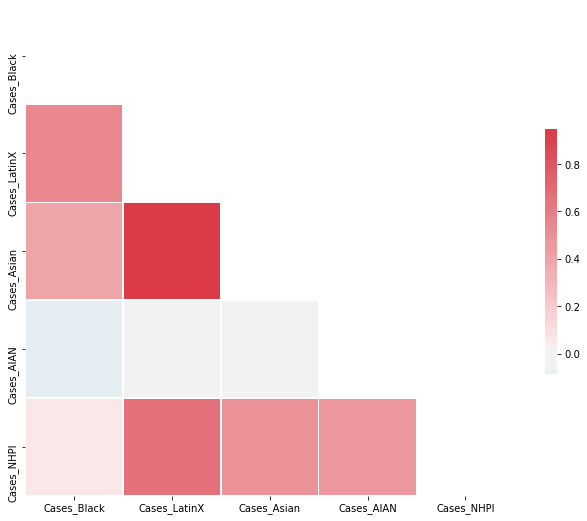

In [4]:
# Compute the correlation matrix
corr=df.iloc[:,1:9].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It look like GRE and GPA are the most significant variables to be admitted into a graduate program, and maybe not coincidentally GRE and GPA area heavily correlated.

ValueError: Could not interpret input 'GRE Score'

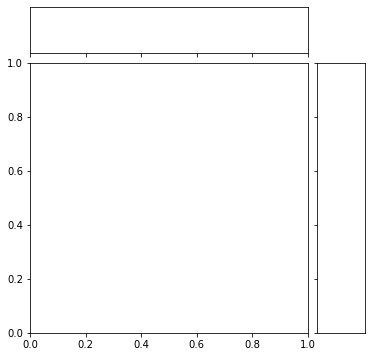

In [5]:
sns.jointplot(x="GRE Score", y="CGPA", data=df)

Does all the features are important given different GPAs?

In [ ]:
#Correlation for different deciles of the most important variable to be admitted
def corr_parts(data,x,y,z,z_cutoff):
    df_temp = data.loc[data[z] > z_cutoff]
    return df_temp[x].corr(df_temp[y])

dl_contrast = np.around(np.percentile(df['CGPA'], np.arange(0, 100, 10)),1)

corr_sop = []
for x in dl_contrast:
    corr_sop.append(corr_parts(df,'SOP','Chance of Admit ','CGPA', x ))
corr_lor = []
for x in dl_contrast:
    corr_lor.append(corr_parts(df,'LOR ','Chance of Admit ','CGPA', x ))
    
result = pd.DataFrame ({'decile': dl_contrast, 'sop': corr_sop, 'lor': corr_lor  })
result = result.melt('decile', var_name='vars',  value_name='corr')

# Set up the seaborn figure
sns.factorplot(x="decile", y="corr", hue='vars', data=result)

The correlation of the statement of purpose and recommendation letters decay in the upper GPA deciles. It means that GPA is so strong that if you have a good one the rest of the variables do not matter that much, on the opposite if your GPA is not the best the these variables really influence the result of the admission.

## Data Transformations

In [ ]:
#Scaling the continuos variables
df_scale = df.copy()
scaler = preprocessing.StandardScaler()
columns =df.columns[1:7]
df_scale[columns] = scaler.fit_transform(df_scale[columns])
df_scale.head()

## Clustering

The first step is to find the number of clusters that minimize the variance but still are a practical number to analyze.

In [ ]:
#Elbow graph
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_scale.iloc[:,1:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(df_scale.iloc[:,2:9])

# Determine the cluster labels of new_points: labels
df_scale['cluster'] = model.predict(df_scale.iloc[:,2:9])

df_scale.head()

Each register has a cluster now, lets visualized using [PCA](https://www.kaggle.com/camiloemartinez/is-the-human-freedom-index-a-good-index). 


In [ ]:
# Create PCA instance: model
model_pca = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model_pca.fit_transform(df_scale.iloc[:,2:9])

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
sns.scatterplot(x=xs, y=ys, hue="cluster", data=df_scale)

The cluster works nice! The tree of them represent a significative population and different to the other populations.

In [ ]:
sns.boxplot(x="cluster", y="Chance of Admit ", data=df_scale, palette="Set2" )

In order to understand, explain and give a meaningful name we explore the centroids of each cluster.

In [ ]:
centroids = model.cluster_centers_
df_scale.iloc[:,1:10].groupby(['cluster']).mean()

In [ ]:
sns.heatmap(df_scale.iloc[:,1:10].groupby(['cluster']).mean(), cmap="YlGnBu")

- Cluster 0: **Top** *students, higher score in all the variables than rest of the population.*
- Cluster 1: **Average** *students, almost average in each variable but some of them have a good score in one variable in particular that make them more eligible in the admission.*
- Cluster 2: **Aspirational** *student, below the average of the population. In limited cases eligible given extraordinary score in a particular variable.*


In [ ]:
pd.DataFrame(df_scale['cluster'].value_counts(dropna=False))

In [ ]:
g = sns.PairGrid(df_scale.iloc[:,1:10], hue="cluster", palette="Set2")
g.map(plt.scatter);

The scatter plots show the segmentation separate very well the population across all the variables. Which is the desire outcome of the exercise.